In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from ydata_profiling import ProfileReport
%matplotlib inline

In [2]:
# Read the CSV file
df = pd.read_csv("bankloans.csv")

In [3]:
# Perform data profiling to understand the structure and characteristics of the data
df.head()  # Display the first few rows of the DataFrame

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [4]:
# Display columns
df.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

In [5]:
# Display information about the columns and data types
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1150 non-null   int64  
 1   ed        1150 non-null   int64  
 2   employ    1150 non-null   int64  
 3   address   1150 non-null   int64  
 4   income    1150 non-null   int64  
 5   debtinc   1150 non-null   float64
 6   creddebt  1150 non-null   float64
 7   othdebt   1150 non-null   float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 81.0 KB


In [6]:
# Display number of columns and rows
df.shape

(1150, 9)

In [7]:
 # Generate descriptive statistics of the numerical columns
df.describe() 

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,700.000000
mean,35.235652,1.695652,8.781739,8.485217,47.982609,10.063391,1.605111,3.103844,0.261429
std,8.089961,0.927051,6.914762,6.977725,40.508814,6.584288,2.135967,3.529273,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.200000,0.415584,1.047996,0.000000
50%,35.000000,1.000000,7.000000,7.000000,36.000000,8.750000,0.899130,2.038053,0.000000
75%,41.000000,2.000000,13.000000,12.000000,56.750000,13.600000,1.898820,3.864960,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


In [8]:
# Generate types
df.dtypes

age           int64
ed            int64
employ        int64
address       int64
income        int64
debtinc     float64
creddebt    float64
othdebt     float64
default     float64
dtype: object

In [9]:
#Missing Values
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     450
dtype: int64

In [10]:
# Generate EDA report 
profile = ProfileReport(df)
profile.to_file("bankloans_eda.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
# Convert relevant columns to appropriate data types
df['age'] = df['age'].astype(float)
df['ed'] = df['ed'].astype(float)
df['employ'] = df['employ'].astype(float)
df['income'] = df['income'].astype(float)
df['debtinc'] = df['debtinc'].astype(float)
df['creddebt'] = df['creddebt'].astype(float)
df['othdebt'] = df['othdebt'].astype(float)

In [12]:
# Replace missing values in 'default' column with -1 (unknown)
imputer = SimpleImputer(strategy='constant', fill_value=-1)
df['default'] = imputer.fit_transform(df[['default']])

In [13]:
# Convert the 'default' column to the 'Int64' data type
df['default'] = df['default'].astype('Int64')

In [14]:
# Get the classes from the modified 'default' column
classes = df['default'].unique()

In [15]:
# Print the classes
print("Classes:", classes)

Classes: <IntegerArray>
[1, 0, -1]
Length: 3, dtype: Int64


In [16]:
# Exclude 'address' column from the analysis
df = df.drop('address', axis=1)

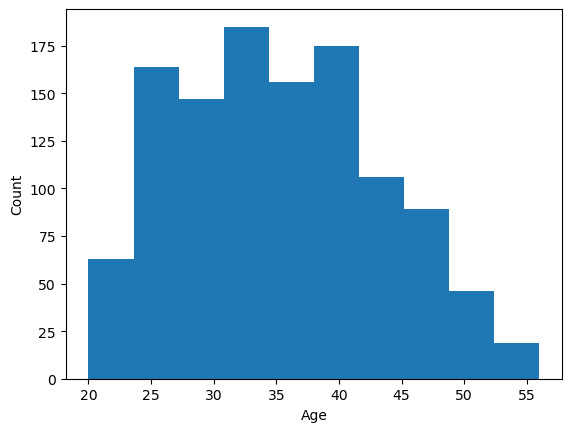

In [17]:
# Plot age histogram
plt.hist(df['age'], bins=10)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

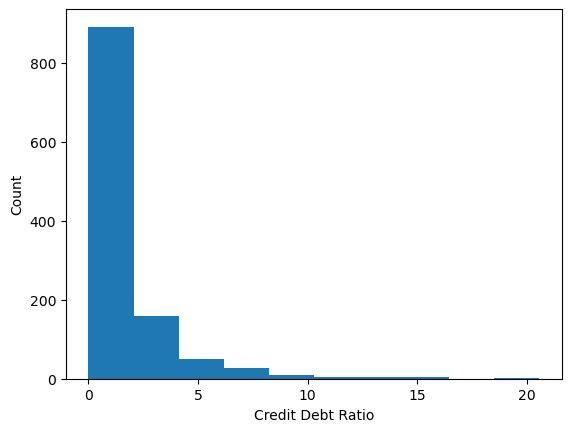

In [18]:
# Plot credit debt histogram
plt.hist(df['creddebt'], bins=10)
plt.xlabel("Credit Debt Ratio")
plt.ylabel("Count")
plt.show()

In [19]:
# Categorize age into brackets
bins = [20, 30, 40, 100]
labels = ['Young', 'Middle Age', 'Old Age']
df['age-bracket'] = pd.cut(df['age'], bins=bins, labels=labels)

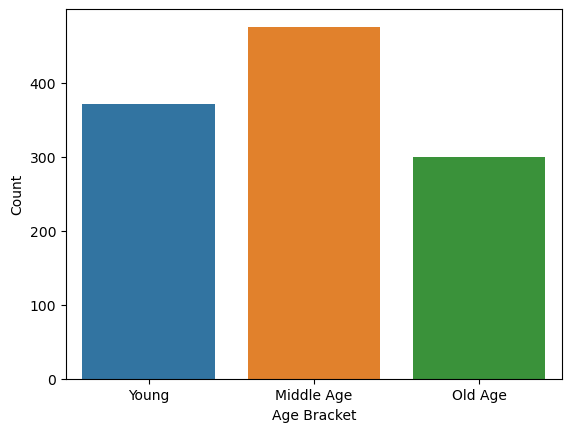

In [20]:
# Plot age bracket histogram
sns.countplot(x='age-bracket', data=df)
plt.xlabel("Age Bracket")
plt.ylabel("Count")
plt.show()

In [21]:
# Compute average default ratio by age bracket
mean_default = df.groupby('age-bracket')['default'].mean()

In [22]:
# Compute average debt-income percentage ratio by age bracket
mean_debtinc = df.groupby('age-bracket')['debtinc'].mean()

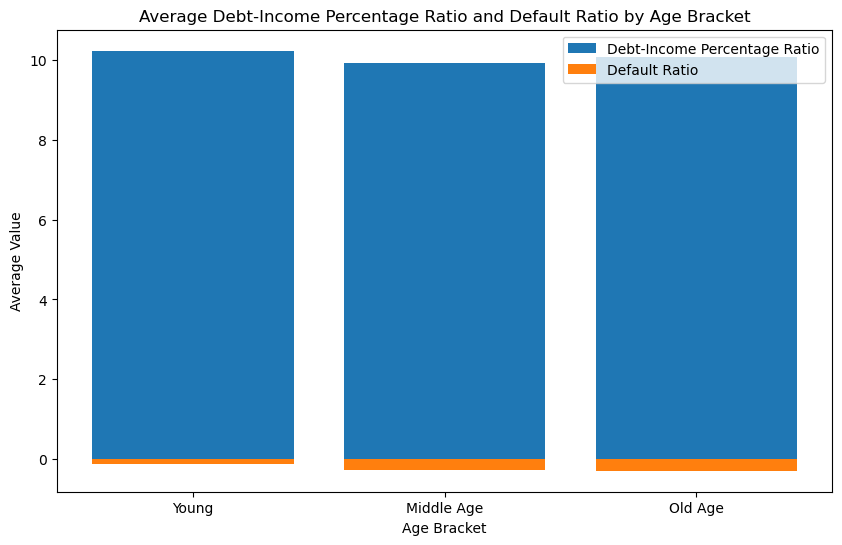

In [23]:
# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(mean_debtinc.index, mean_debtinc.values, label='Debt-Income Percentage Ratio')
plt.bar(mean_default.index, mean_default.values, label='Default Ratio')
plt.xlabel('Age Bracket')
plt.ylabel('Average Value')
plt.title('Average Debt-Income Percentage Ratio and Default Ratio by Age Bracket')
plt.legend()
plt.show()


In [24]:
# Perform analysis on education level, income, and other debt as desired

# Example: Average default ratio by education level
mean_default_edu = df.groupby('ed')['default'].mean()

In [25]:
# Example: Average income by education level
mean_income_edu = df.groupby('ed')['income'].mean()

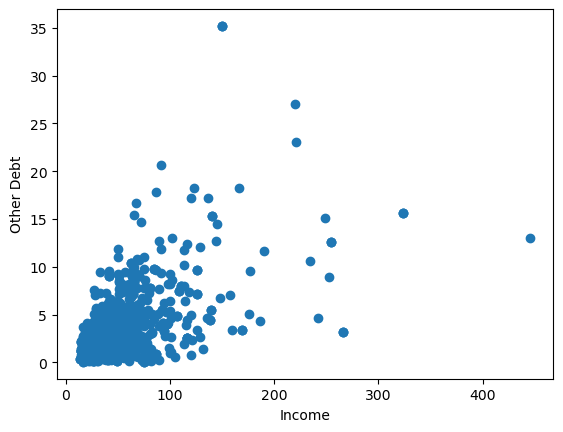

In [26]:
# Example: Scatter plot of income against other debt
plt.scatter(df['income'], df['othdebt'])
plt.xlabel("Income")
plt.ylabel("Other Debt")
plt.show()

In [27]:
# Compute correlation matrix
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

               age        ed    employ    income   debtinc  creddebt  \
age       1.000000  0.002492  0.574267  0.473617 -0.001158  0.259070   
ed        0.002492  1.000000 -0.147498  0.201183  0.006585  0.112560   
employ    0.574267 -0.147498  1.000000  0.630706 -0.035746  0.355986   
income    0.473617  0.201183  0.630706  1.000000 -0.044926  0.531977   
debtinc  -0.001158  0.006585 -0.035746 -0.044926  1.000000  0.532365   
creddebt  0.259070  0.112560  0.355986  0.531977  0.532365  1.000000   
othdebt   0.335375  0.113552  0.423628  0.596108  0.560218  0.658881   
default  -0.102258  0.075561 -0.165379 -0.088555  0.185933  0.065742   

           othdebt   default  
age       0.335375 -0.102258  
ed        0.113552  0.075561  
employ    0.423628 -0.165379  
income    0.596108 -0.088555  
debtinc   0.560218  0.185933  
creddebt  0.658881  0.065742  
othdebt   1.000000  0.037411  
default   0.037411  1.000000  


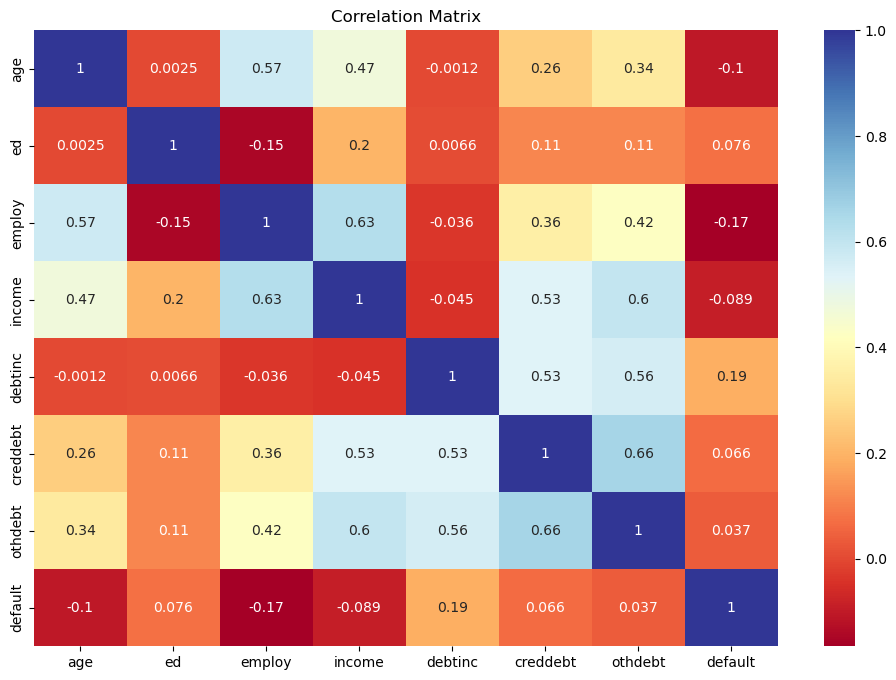

In [28]:
# Plot correlation matrix using heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlBu")
plt.title("Correlation Matrix")
plt.show()

In [29]:
# Split the data into features (X) and target variable (y)
X = df.drop(['default', 'age-bracket'], axis=1)  # Features (all columns except 'default' and 'age-bracket')
print(X)

       age   ed  employ  income  debtinc   creddebt   othdebt
0     41.0  3.0    17.0   176.0      9.3  11.359392  5.008608
1     27.0  1.0    10.0    31.0     17.3   1.362202  4.000798
2     40.0  1.0    15.0    55.0      5.5   0.856075  2.168925
3     41.0  1.0    15.0   120.0      2.9   2.658720  0.821280
4     24.0  2.0     2.0    28.0     17.3   1.787436  3.056564
...    ...  ...     ...     ...      ...        ...       ...
1145  34.0  1.0    12.0    32.0      2.7   0.239328  0.624672
1146  32.0  2.0    12.0   116.0      5.7   4.026708  2.585292
1147  48.0  1.0    13.0    38.0     10.8   0.722304  3.381696
1148  35.0  2.0     1.0    24.0      7.8   0.417456  1.454544
1149  37.0  1.0    20.0    41.0     12.9   0.899130  4.389870

[1150 rows x 7 columns]


In [30]:
# Convert the target variable into integer format
y = df['default'].astype(int)

In [31]:
# One-hot encode the categorical variables
categorical_columns = ['age-bracket']
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = pd.DataFrame(encoder.fit_transform(df[categorical_columns]))
X_encoded.columns = encoder.get_feature_names_out(categorical_columns)
X = pd.concat([X, X_encoded], axis=1)

In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Perform feature scaling on the numerical features
scaler = StandardScaler()
numerical_columns = ['age', 'employ', 'income', 'debtinc', 'creddebt', 'othdebt']
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [34]:
# Train the random forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
# Get the classes from the trained model
classes = model.classes_

In [36]:
# Print the classes
print("Classes:", classes)

Classes: [-1  0  1]


In [37]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [46]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7782608695652173


In [47]:
# Calculate precision for each class
precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)

Precision: 0.7005827505827505


In [48]:
# Calculate sensitivity (recall) for each class
sensitivity = recall_score(y_test, y_pred, average='macro')
print("Sensitivity (Recall):", sensitivity)

Sensitivity (Recall): 0.6682146542827656


In [49]:
# Calculate F1 score for each class
f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score:", f1)

F1 Score: 0.6627607637463049
